In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
%matplotlib inline

In [4]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [25]:
test_df = pd.read_csv("Titanic_test.csv")
train_df = pd.read_csv("Titanic_train.csv")

# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [53]:
for c in train_df:
    if not c in test_df.columns:
        print(f"test data frame doesn\'t have \"{c}\" column")

test data frame doesn't have "Survived" column


# Q2: 測試資料集是否有遺失值?

In [52]:
print("has missing value:")
for b in test_df:
    if test_df[b].isnull().any():
        print(b)

has missing value:
Age
Fare
Cabin


# Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。

In [59]:
data = train_df.append(test_df)
print(data.info())
print('Age 遺失個數=',data['Age'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None
Age 遺失個數= 263


In [61]:
print(data["Age"].value_counts())

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
20.50     1
11.50     1
22.50     1
0.33      1
60.50     1
Name: Age, Length: 98, dtype: int64


In [63]:
data["Age"].head(10)
data["Age"] = data["Age"].apply(lambda x: str(x)[0] if not pd.isnull(x) else "NoAge")
data["Age"].unique()

array(['2', '3', 'NoAge', '5', '1', '4', '8', '6', '7', '0', '9'],
      dtype=object)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

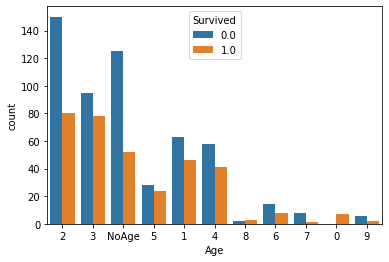

In [64]:
sns.countplot(data["Age"], hue = data["Survived"])

In [67]:
print(data[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print("missing value is near to 9 Age")

      Age  Survived
0       0  1.000000
8       8  0.600000
5       5  0.461538
3       3  0.450867
1       1  0.422018
4       4  0.414141
6       6  0.363636
2       2  0.347826
10  NoAge  0.293785
9       9  0.250000
7       7  0.111111
missing value is near to 9 Age
